In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob

In [35]:
data = pd.read_pickle('./../results/kswap-replication/class-4-df.pickle')
data = data[data['algorithm'] == "exhaustive_msg"]

In [36]:
data.head()

,algorithm,cost,real_time,run_time,gen_size,phi_size,G1_length,G2_length,G1_variables,G2_variables,var_coeff,atom_coeff,class,k,W,V,scope
3,exhaustive_msg,-1,-1.0,-1.0,-1,-1,17,14,10,9,3628800,9072000,4,NIL,NIL,NIL,global
7,exhaustive_msg,-1,-1.0,-1.0,-1,-1,18,13,10,9,3628800,16934400,4,NIL,NIL,NIL,global
11,exhaustive_msg,-1,-1.0,-1.0,-1,-1,14,16,10,10,3628800,16934400,4,NIL,NIL,NIL,global
15,exhaustive_msg,-1,-1.0,-1.0,-1,-1,15,16,10,10,3628800,14515200,4,NIL,NIL,NIL,global
19,exhaustive_msg,-1,-1.0,-1.0,-1,-1,18,17,10,10,3628800,10368000,4,NIL,NIL,NIL,global


In [37]:
file = './../results/1-swap-benchmark/results-class-4-KSWAP_MSG_OMEGA-k-NIL-w-NIL-v-NIL-scope-global.csv'

column_names = ["cost", "real_time", "run_time", "gen_size", "phi_size",
                "G1_length", "G2_length", "G1_variables", "G2_variables", "var_coeff", "atom_coeff",
                "class", "k", "W", "V", "scope"]

kswap_df = pd.read_csv(file, names=column_names)

In [38]:
kswap_df.head()

,cost,real_time,run_time,gen_size,phi_size,G1_length,G2_length,G1_variables,G2_variables,var_coeff,atom_coeff,class,k,W,V,scope
0,88,18.000,17.910,80,13,17,14,10,9,3628800,9072000,4,NIL,NIL,NIL,global
1,88,9.000,8.699,80,12,18,13,10,9,3628800,16934400,4,NIL,NIL,NIL,global
2,59,8.001,7.713,81,11,14,16,10,10,3628800,16934400,4,NIL,NIL,NIL,global
3,88,12.000,12.018,88,14,15,16,10,10,3628800,14515200,4,NIL,NIL,NIL,global
4,96,16.001,16.448,106,17,18,17,10,10,3628800,10368000,4,NIL,NIL,NIL,global


In [39]:
solutions_found_data = {
    'exhaustive': (len(data[data['cost'] > -1])/len(data))*100,
    '1-swap': (len(kswap_df[kswap_df['cost'] > -1])/len(kswap_df))*100,
}

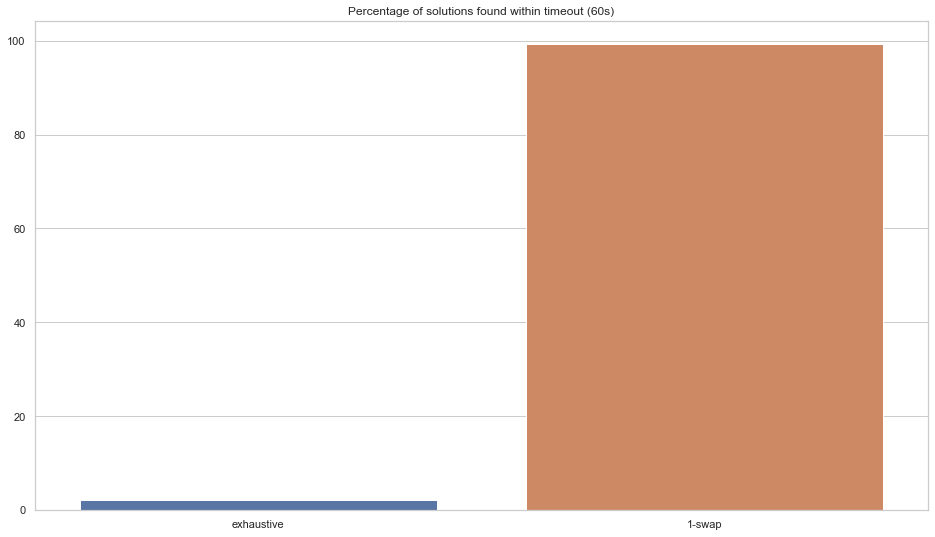

In [40]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=list(solutions_found_data.keys()), y=list(solutions_found_data.values()))
ax.set_title('Percentage of solutions found within timeout (60s)')
plt.savefig('class-4-percentage-solutions.pdf', bbox_inches='tight')

In [6]:
cost_data = {
    'exhaustive': data[data['cost'] > -1]['cost'],
    '1-swap': kswap_df[kswap_df['cost'] > -1]['cost'],
}
cost_df = pd.concat(cost_data, axis = 1)

Text(0.5, 1.0, '1-Swap - Class 4')

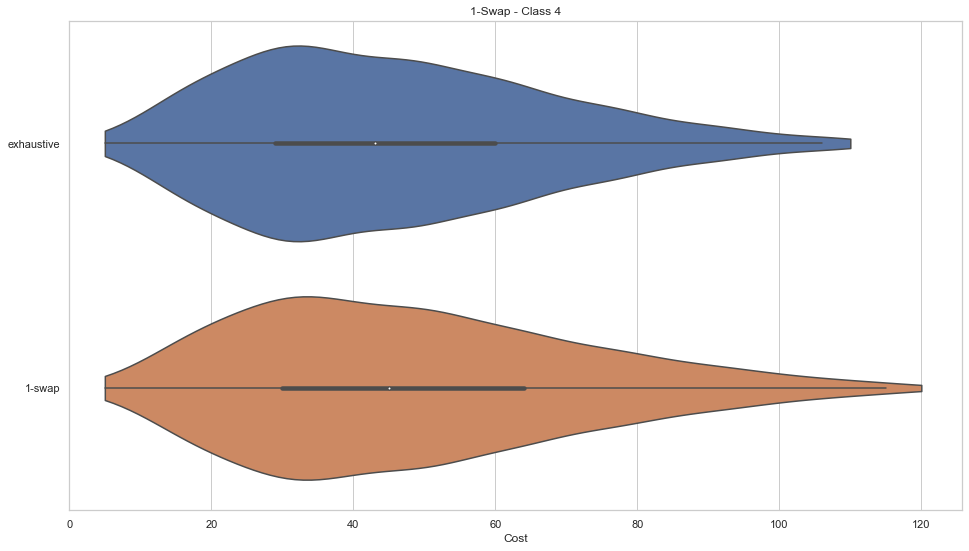

In [8]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_theme(style='whitegrid')
ax = sns.violinplot(data=cost_df, cut=0, orient='h')
ax.set_xlim(0)
ax.set_xlabel('Cost')
ax.set_title('1-Swap - Class 4')
# plt.savefig('class-4-cost.pdf', bbox_inches='tight')

In [14]:
def percentage_increase(orig_value, new_value):
    if orig_value > -1 and new_value > -1:
        difference = new_value - orig_value
        increase = difference / orig_value
        percentage = increase * 100
        return percentage

In [33]:
new_rows = []
for i in range(1000):
    exhaustive_row = data.iloc[i]
    kswap_row = kswap_df.iloc[i]
    relative_cost = percentage_increase(exhaustive_row['cost'], kswap_row['cost'])
    new_rows.append({'relative cost': relative_cost})

relative_df = pd.DataFrame(new_rows, columns=['relative cost'])

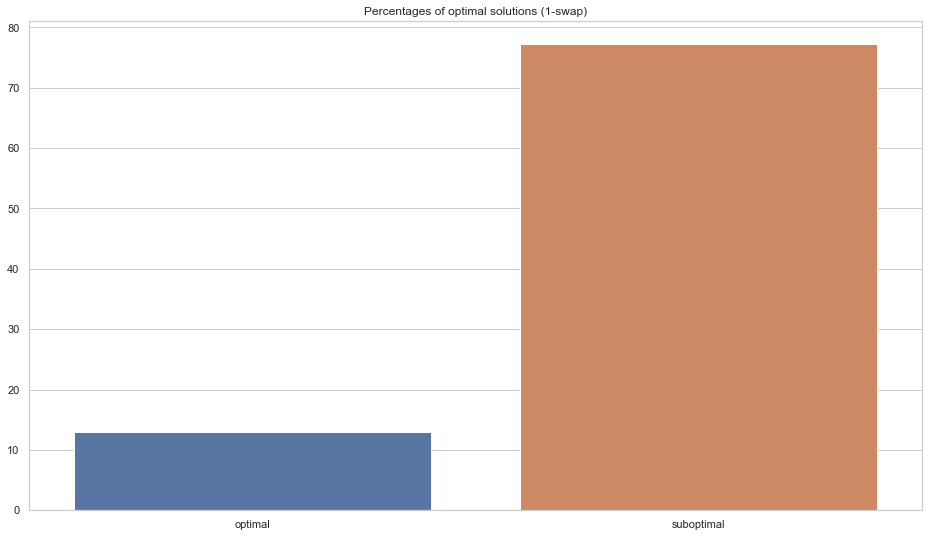

In [34]:
num_solutions_data = {
    'optimal': (len(relative_df[relative_df['relative cost'] == 0])/len(relative_df))*100,
    'suboptimal': (len(relative_df[relative_df['relative cost'] > 0])/len(relative_df))*100,
}

fig, ax = plt.subplots(figsize=(16,9))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=list(num_solutions_data.keys()), y=list(num_solutions_data.values()))
ax.set_title('Percentages of optimal solutions (1-swap)')
# ax.set_ylim(900, 1025)
plt.savefig('class-3-optimal-solutions.pdf', bbox_inches='tight')

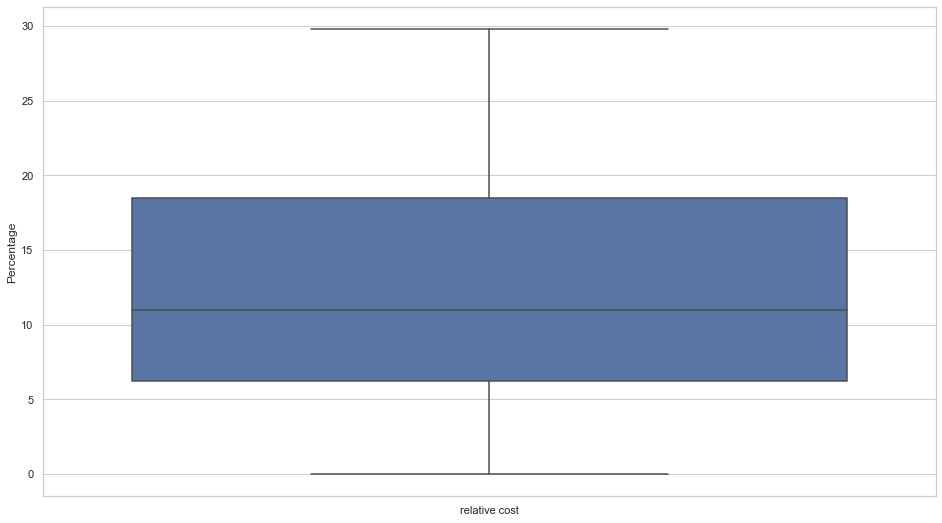

In [104]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_theme(style='whitegrid')
ax = sns.boxplot(data=relative_df, showfliers=True)
# ax.set_title('Relative change in cost')
ax.set_ylabel('Percentage')
plt.savefig('class-4-relative-cost.pdf', bbox_inches='tight')

In [84]:
time_data = {
    'exhaustive': data[data['real_time'] > -1]['real_time'],
    '1-swap': kswap_df[kswap_df['real_time'] > -1]['real_time'],
}
time_df = pd.concat(time_data, axis = 1)

Text(0.5, 0, 'Time (ms)')

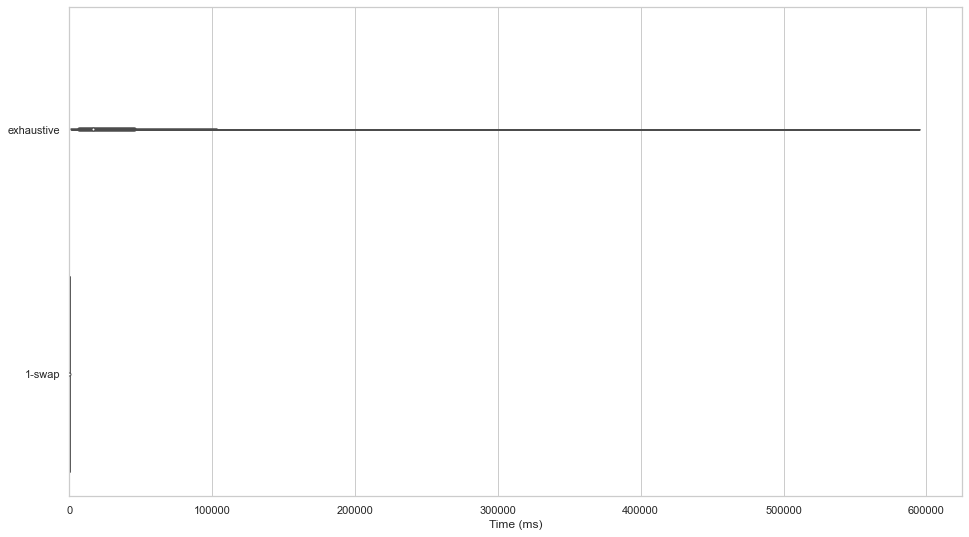

In [85]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_theme(style='whitegrid')
ax = sns.violinplot(data=time_df, cut=0, orient='h')
ax.set_xlim(0)
ax.set_xlabel('Time (ms)')
# ax.set_title(f'Class {CLASS} - k=inf - W=1 - V=1')
# plt.savefig('cost.pdf', bbox_inches='tight')

In [87]:
kswap_df['real_time'].describe()

count    1000.000000
mean        4.268134
std         1.636769
min        -1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        17.001000
Name: real_time, dtype: float64